# Supplementary File 11; dealing with outliers


In [1]:
#packages
import pandas as pd 

df_loftool = pd.read_csv('df_loftool.csv') 
df_loftool.info()

q1 = df_loftool.LoFtool.quantile(0.25) 
q3 = df_loftool.LoFtool.quantile(0.75) 
iqr = q3 - q1 

lower_outlier = q1 - 1.5*iqr
upper_outlier = q3 + 1.5*iqr
outliers = df_loftool[(df_loftool.LoFtool <lower_outlier)|(df_loftool.LoFtool >upper_outlier)] 
print("number of outliers, based on iqr:", len(outliers))

#export out to csv 
outliers.to_csv('loftool_outliers_isolated.csv', index = False) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37220 entries, 0 to 37219
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   POS               37220 non-null  int64  
 1   AF_ESP            37220 non-null  float64
 2   AF_EXAC           37220 non-null  float64
 3   AF_TGP            37220 non-null  float64
 4   cDNA_position     37220 non-null  float64
 5   CDS_position      37220 non-null  float64
 6   Protein_position  37220 non-null  int64  
 7   STRAND            37220 non-null  float64
 8   LoFtool           37220 non-null  float64
 9   CHROM             37220 non-null  float64
 10  REF               37220 non-null  float64
 11  ALT               37220 non-null  float64
 12  MC                37220 non-null  float64
 13  IMPACT            37220 non-null  float64
 14  SYMBOL            37220 non-null  float64
 15  Feature           37220 non-null  float64
 16  EXON              37220 non-null  float6

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37220 entries, 0 to 37219
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   POS               37220 non-null  float64
 1   AF_ESP            37220 non-null  float64
 2   AF_EXAC           37220 non-null  float64
 3   AF_TGP            37220 non-null  float64
 4   cDNA_position     37220 non-null  float64
 5   CDS_position      37220 non-null  float64
 6   Protein_position  37220 non-null  float64
 7   STRAND            37220 non-null  float64
 8   LoFtool           37220 non-null  float64
 9   CHROM             37220 non-null  float64
 10  REF               37220 non-null  float64
 11  ALT               37220 non-null  float64
 12  MC                37220 non-null  float64
 13  IMPACT            37220 non-null  float64
 14  SYMBOL            37220 non-null  float64
 15  Feature           37220 non-null  float64
 16  EXON              37220 non-null  float6

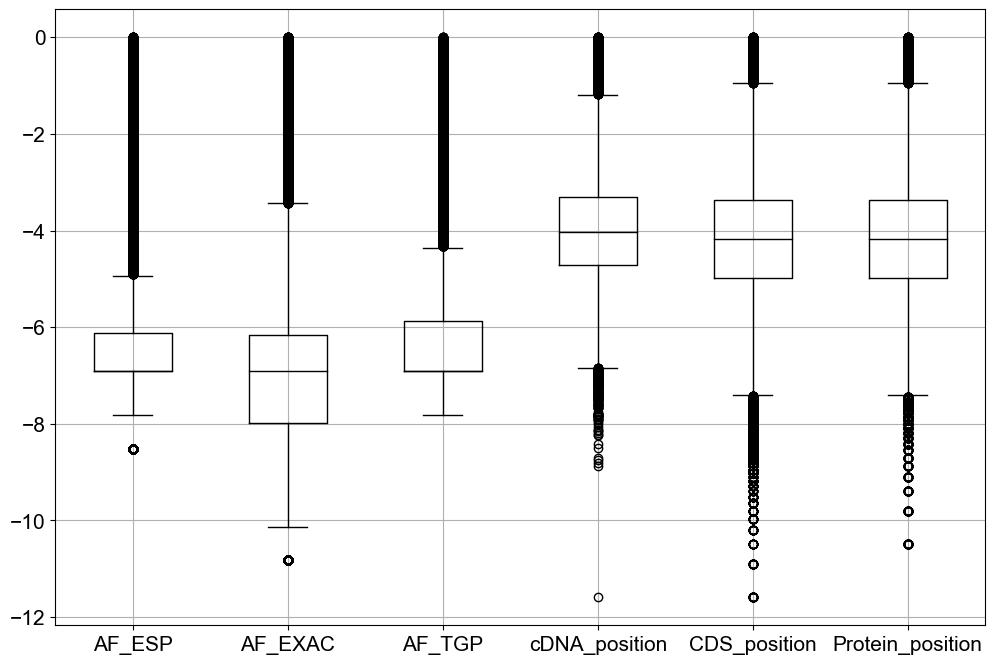

In [7]:
#log transforming 
#took input/learned from chatgpt here but did not directly copy paste 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mstats
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()
df = pd.read_csv('df_loftool.csv')
df_loftool = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

columns = ['AF_ESP', 'AF_EXAC', 'AF_TGP', 'cDNA_position', 'CDS_position', 'Protein_position'] 
for column in columns: 
    limit = df_loftool[column] <= 0
    constant = 0.001
    df_loftool.loc[limit, column] = df_loftool.loc[limit, column] + constant 
    df_loftool[column] = np.log(df_loftool[column])

plt.rcParams['font.family'] = 'Arial' 
plt.rcParams['font.size'] = 15

fig, axis = plt.subplots(figsize = (12,8)) 
df_loftool.boxplot(column = columns, figsize = (12,8), color = 'black')
axis.tick_params(axis = 'both', which = 'major') 
plt.savefig('loftool_boxplots_log.png', dpi=800, bbox_inches = 'tight')

df_loftool.info()

#export out to csv 
df_loftool.to_csv('df_loftool_log.csv', index = False) 

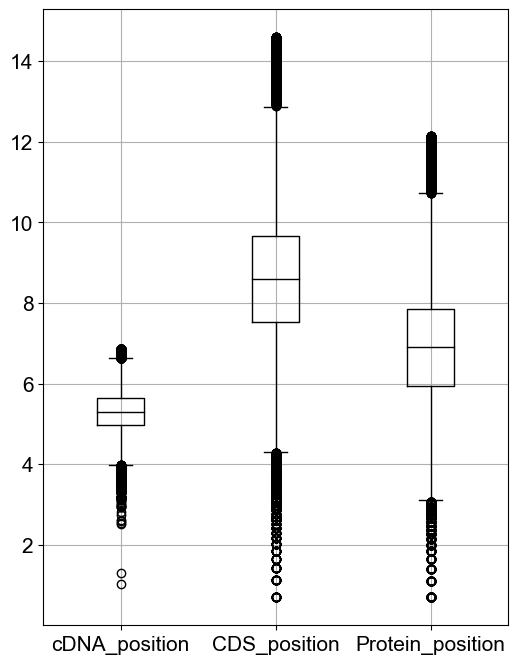

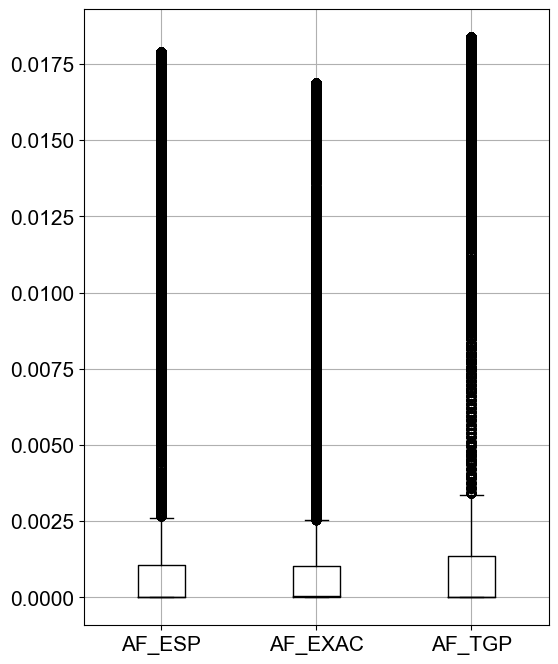

In [8]:
#signed power (yeo-johnson) transformation
#original encoding was preserved 
#took input from chatgpt here 
import pandas as pd 
from scipy import stats 
import sklearn 

df = pd.read_csv('df_loftool.csv')

cols_to_yeojohnson = ['AF_ESP', 'AF_EXAC', 'AF_TGP', 'cDNA_position', 'CDS_position', 'Protein_position'] 
for col in cols_to_yeojohnson: 
    transformed_cols, lambda_ = stats.yeojohnson(df[col])
    df[col] = transformed_cols

ccc = ['cDNA_position', 'CDS_position', 'Protein_position'] 
fig, axis = plt.subplots(figsize = (6,8)) 
df.boxplot(column = ccc, figsize = (12,8), color = 'black')
axis.tick_params(axis = 'both', which = 'major', labelsize = 15) 
plt.savefig('loftool_boxplots_yj_ccc.png', dpi=800, bbox_inches = 'tight')
plt.show()

af = ['AF_ESP', 'AF_EXAC', 'AF_TGP'] 
fig, axis = plt.subplots(figsize = (6,8)) 
df.boxplot(column = af, figsize = (12,8), color = 'black')
axis.tick_params(axis = 'both', which = 'major', labelsize = 15) 
plt.savefig('loftool_boxplots_yj_af.png', dpi=800, bbox_inches = 'tight')
plt.show()

df.to_csv('df_loftool_yj.csv', index = False) 